<a href="https://colab.research.google.com/github/CalebJThatch/Cybersecurity-quiz/blob/main/Lab_7_finding_errors_in_acceleration_data_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
#7.0.1
import io  #io has the tools we need to "i"nput and "o"utput files.
import pandas as pd #pandas has tools to deal with tables of data (normally tables are called "DataFrames" in Python).
import numpy as np #np has mathematical tools we will need every week.
from google.colab import files #files allow us to upload our csv files into google Colab.
import matplotlib.pyplot as plt #our plotting tools
from scipy.optimize import curve_fit #our curve fitting tool

In [ ]:
#7.0.2
uploaded = files.upload() #This command gets our data file into google colab's memory
dataframe = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))# This now moves the data we uploaded into a "dataframe" which we can then manipulate.

print(dataframe[0:2])

Saving Sampling_Rate50 (1).csv to Sampling_Rate50 (1) (1).csv
   Data Set 1:Time(s)  Data Set 1:Position(m)  Data Set 1:Velocity(m/s)  \
0                0.00                0.321770                  0.034342   
1                0.02                0.321857                  0.078594   

   Data Set 1:Acceleration(m/s²)  
0                       2.527642  
1                       2.938506  


In [ ]:
#7.0.3
#since we will be looking at multiple data sets, we can update column names here so we don't have to change a bunch of names throughout our code below.
i=1
header='Data Set '  #I still don't know what the start of your data file looks like.  Here are two options.


time=header+str(i)+':Time(s)' #This should match the first column header in the previous cell's output.  This is the version you get if you do not run the data directly to your computer.
pos=header+str(i)+':Position(m)'
vel=header+str(i)+':Velocity(m/s)'
acc=header+str(i)+':Acceleration(m/s²)'
df=dataframe[[time,pos,vel, acc]].dropna()  #this limits our data to just one run and removes any annoying NaN values that might be hiding at the end of our data.
#So "dataframe" has all the data from the csv file, "df" only holds the data from the single run we are looking at now.

bouncing_mass = 0.2 #Include the mass of the hook and everything on it but not the spring here.
spring_mass= 0.026
#we might want to include 1/3 of the mass of the spring if the object is bouncing, but we should compare results to see if this actually improves our data quality...
#bouncing_mass=bouncing_mass+spring_mass/3

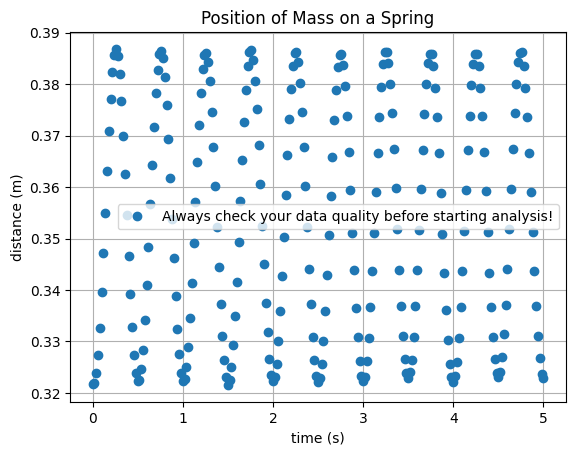

In [ ]:
#7.0.4
plt.plot(df[time],df[pos], 'o', label="Always check your data quality before starting analysis!") #this plots position vs time.  Not what we need but it is good to check that this matches what the labquest displayed.
plt.legend()

plt.grid()
plt.ylabel("distance (m)")
plt.xlabel("time (s)")
plt.title("Position of Mass on a Spring")
plt.show()

Part 0: Finding k_CBR

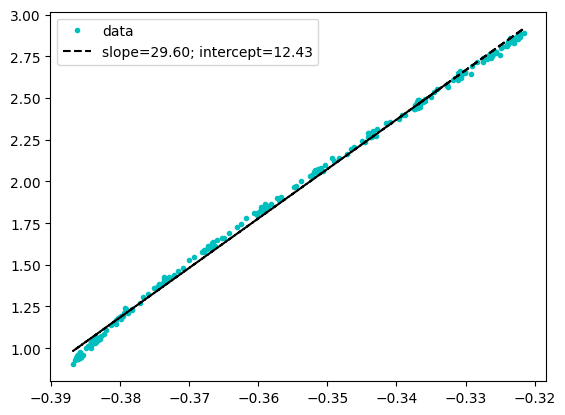

29.60983697740028


In [ ]:
#7.0.5
#you will need this block of code mutltiple times when you are ready to take linear fits.  Right now it will not work until you tell it what parameters should go in the place of Xvalues and Yvalues
def model_Linear(x,m,b):  #We are using y=m x+b as our model
  return m*(x)+b

Xvalues=-df[pos][4:-4]    #something needs to be added here for this block to work.
Yvalues=(bouncing_mass)*(9.81+df[acc][4:-4])   #something needs to be added here for this block to work.

[m_opt, b_opt], pcov = curve_fit(model_Linear, Xvalues, Yvalues)


y_model = model_Linear(Xvalues, m_opt, b_opt)  #this uses the optimum slope and intercept that were just calculated to calculate y_model values our Linear Model

plt.plot(Xvalues,Yvalues, '.c',   label="data")
plt.plot(Xvalues,y_model, '--k', label='slope='+str(m_opt)[0:5]+'; intercept='+str(b_opt)[0:5])

plt.legend()
plt.show()

k_CBR=m_opt      #something needs to be added here for this block to work.
print(k_CBR)


Task 1: Finding our own velocity and **acceleration**

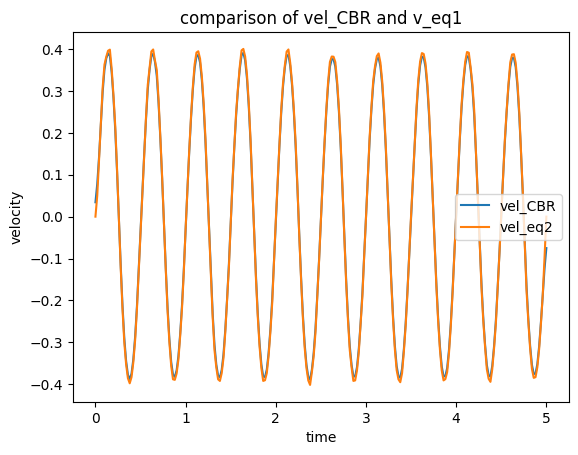

In [ ]:
#7.1.1
v_eq1=np.zeros(len(df[vel]))
for i in range(len(df[vel])-2):
  v_eq1[i+1]=(df[pos][i+2]-df[pos][i])/(df[time][i+2]-df[time][i])


plt.plot(df[time],df[vel],label="vel_CBR")
plt.plot(df[time],v_eq1,label="vel_eq2")
plt.title("comparison of vel_CBR and v_eq1")
plt.xlabel("time")
plt.ylabel("velocity")
plt.legend()
plt.show()



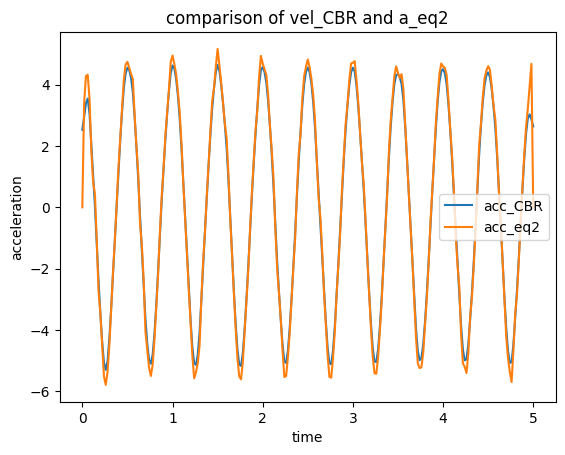

In [ ]:
#7.1.2
#Now you need to find the acceleration



a_eq2=np.zeros(len(df[acc]))
for i in range(len(df[acc])-2):
  a_eq2[i+1]=(v_eq1[i+2]-v_eq1[i])/(df[time][i+2]-df[time][i])
plt.plot(df[time],df[acc],label="acc_CBR")
plt.plot(df[time],a_eq2,label="acc_eq2")
plt.title("comparison of vel_CBR and a_eq2")
plt.xlabel("time")
plt.ylabel("acceleration")
plt.legend()
plt.show()


30.540277423367453


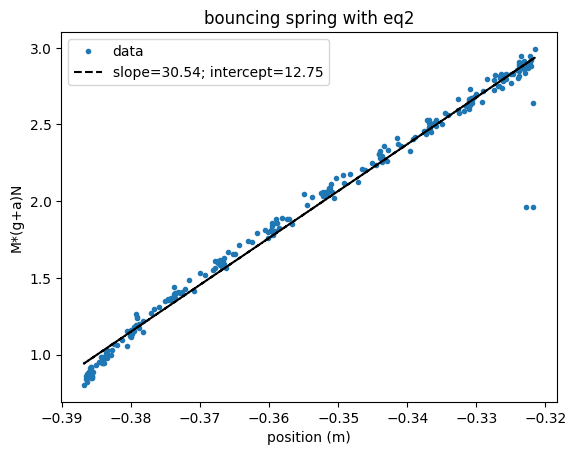

In [ ]:
#7.1.3
# Copy and paste your linear fit code to extract the new k value, k_eq2


Xvalues=-df[pos];   #something needs to be added here for this block to work.
Yvalues=(bouncing_mass)*9.8+(bouncing_mass)*a_eq2;  #something needs to be added here for this block to work.
def model_Linear(x,m,b):  #We are using y=m x+b as our model
  return m*(x)+b

[m_opt, b_opt], pcov = curve_fit(model_Linear, Xvalues, Yvalues)


y_model = model_Linear(Xvalues, m_opt, b_opt)  #this uses the optimum slope and intercept that were just calculated to calculate y_model values our Linear Model

plt.plot(Xvalues,Yvalues, '.',   label="data")
plt.plot(Xvalues,y_model, '--k', label='slope='+str(m_opt)[0:5]+'; intercept='+str(b_opt)[0:5])
plt.title("bouncing spring with eq2")
plt.xlabel("position (m)")
plt.ylabel("M*(g+a)N")

k_eq2=m_opt
print(k_eq2)

plt.legend()
plt.show()

   #something needs to be added here for this block to work.


In [ ]:
#7.1.4
print("k_CBR = ", k_CBR)
print("k_eq2 = ", k_eq2)
#Are these values reasonably close? (say within 10% or 20% of each other and the value printed on the white box; if not call the instructor over!)

k_CBR =  29.60983697740028
k_eq2 =  30.540277423367453


Task 2: Fitting a sine function

In [ ]:
#7.2.1
#Don't change this block! Feel free to read, but the coding tricks used here are a bit beyond the scope of PHY 241.
#This block does not generate an output, but it needs to be run to teach the computer how to do the "fit_sin" function that is used in the next block of code.

def fit_sin(tt, yy):  #when you enter time in the tt position, and your data in the yy position, this finds the best fit line for yy=A*sin(2*pi*f*t+phase)+offset
    tt = np.array(tt)  #just in case the data does not come in as a np.array()
    yy = np.array(yy)

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c #this is where we tell the program what function we want to fit to.

    #This part of the code is looking at the yy data and trying to come up with some rough guesses for the frequency, amplitude, offset...
    #The Frequency should line up with the peak of the Fourier Transform, but exclude the zero frequency (which is just the offset)

    # fft-> Fast Fourier Transform helps us find the frequency
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0])) #ff is a list of frequencies
    FFT=np.fft.fft(yy)  #FFT is the complex Fast Fourier Transform
    Fyy = abs(FFT) #Fyy is just the amplitude of FFT (throwing away angle information)
    phase_offsets=np.angle(FFT) #phase offsets only holds onto the phases (thowing away the amplitude information)
    L=int(len(Fyy)/2)  #we only want to look in the first half of the transform for our information.

    guess_freq = abs(ff[np.argmax(Fyy[1:L])+1])  #The guess frequency needs to be the largest amplitude
    guess_phase=np.angle(np.fft.fft(yy))[np.argmax(Fyy[1:L])]   #the guess_phase needs to be the phase that goes with that same larges amplitude.
#    print("guess frequency ", guess_freq)
#    print("guess_phase ", guess_phase)


#Uncomment this block together to get a graph to see what information the FFT is giving.
#    fig, axis1 = plt.subplots()  #trying to visualize the two parts of FFT.  Black is the Amplitude, Blue is the phase
#    axis1.set_xlabel('frequency (Hz)')  #label the x axis
#    axis2 = axis1.twinx()         #copy that x axis for the second data set
#    axis1.plot(ff[1:L],Fyy[1:L],'.k')    #put our amplitude on axis 1
#    axis2.plot(ff[1:L],phase_offsets[1:L],'.b')  #put our phase on axis 2
#    axis1.axvline(ff[np.argmax(Fyy[1:L])+1], color='r', label="guess frequency")
#    axis1.set_ylabel('frequency strength', color='k')  #this makes our first y axis look good and clearly indicates that the black points go with the black labels
#    axis1.tick_params(axis='y', labelcolor='k')
#    axis2.set_ylabel('phase (rad)', color='b')   #this makes our second y axis look good and clearly indicates that the blue points go with the blue labels
#    axis2.tick_params(axis='y', labelcolor='b')
#    axis1.set_title("Finding the strongest frequency and the phase of that frequency")
#    axis1.legend()
#    fig.show()

    guess_amp = np.std(yy) * 2.**0.5            #The amplitude should be related to the standard deviation.
    guess_offset = np.mean(yy)                  #The offset should be about equal to the average of our yy data.

#This shows that the guesses are NOT good enough.
#    plt.plot(tt,yy, label="raw data")
#    plt.plot(tt,sinfunc(tt,guess_amp,2.*np.pi*guess_freq, guess_phase, guess_offset), label="fit using guesses")
#    plt.legend()
#    plt.show()

    guess = np.array([guess_amp, 2.*np.pi*guess_freq, guess_phase, guess_offset])  #Compress all of our guesses into a single list called "guess"

    popt, pcov = curve_fit(sinfunc, tt, yy, p0=guess)  #This refines our guesses and gives much more accurate values into the popt list
    A, w, p, c = popt                           #This pulls the values we want back out of the popt list.
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)} #finally the values we want are returned.


Amplitude=0.031907649249664716, phase=4.610380218786391, offset=0.353771748939308, frequency=2.0043689539890224


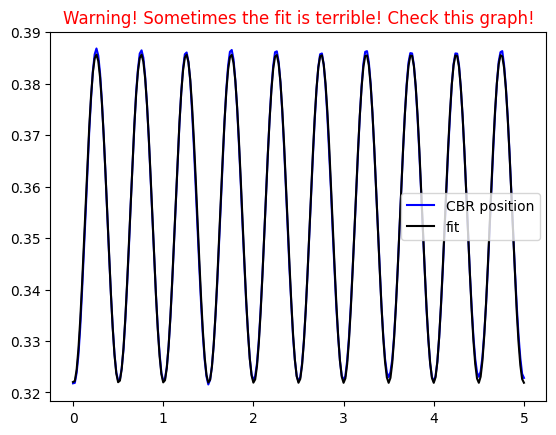

In [ ]:
#7.2.2
tt = df[time] #putting the data we want to fit into the tt and yy symbols
yy = df[pos]


fit_parameters = fit_sin(tt, yy) #this runs the entire block of code above to find the parameters
print( "Amplitude=%(amp)s, phase=%(phase)s, offset=%(offset)s, frequency=%(freq)s" % fit_parameters )

plt.plot(tt, yy, "b-", label="CBR position")
plt.plot(tt, fit_parameters["fitfunc"](tt), "-k", label="fit")
plt.title("Warning! Sometimes the fit is terrible! Check this graph!", color='r')  #if the fit is terrrible try removing a few points.  For example: tt = df[time][:-5]  AND yy = df[pos][:-5] at the top of this block
#Are you going to label your graphs?

plt.legend()
plt.show()

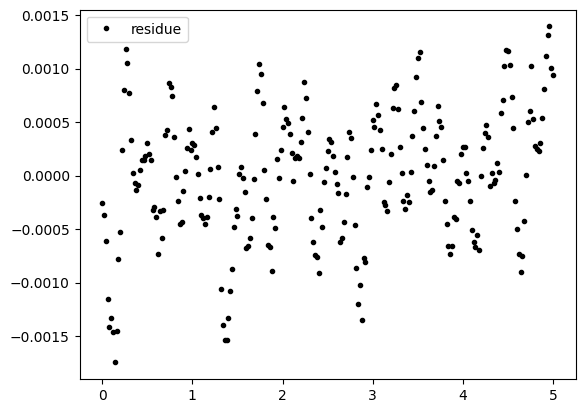

In [ ]:
#7.2.3
#lets just do some checks to make sure we are happy with the fit
plt.plot(tt,yy-fit_parameters["fitfunc"](tt),'k.',label='residue')
plt.legend()
plt.show()

In [ ]:
#7.2.4
print(fit_parameters)
print(fit_parameters['freq'])  #This is how you get specific fit parameters out of the list fit_parameters.

{'amp': np.float64(0.031907649249664716), 'omega': np.float64(12.593821561870742), 'phase': np.float64(4.610380218786391), 'offset': np.float64(0.353771748939308), 'freq': np.float64(2.0043689539890224), 'period': np.float64(0.4989101422718788), 'fitfunc': <function fit_sin.<locals>.<lambda> at 0x7f0114d0d760>, 'maxcov': np.float64(1.1738931384924072e-05), 'rawres': (array([ 0.03201419, 12.51630539,  3.12971212,  0.35357618]), array([ 0.03190765, 12.59382156,  4.61038022,  0.35377175]), array([[ 2.92282754e-09, -1.60450583e-09,  3.97813181e-09,
         1.39420907e-11],
       [-1.60450583e-09,  1.41087799e-06, -3.53062285e-06,
         3.48282686e-09],
       [ 3.97813181e-09, -3.53062285e-06,  1.17389314e-05,
        -8.69679229e-09],
       [ 1.39420907e-11,  3.48282686e-09, -8.69679229e-09,
         1.47793679e-09]]))}
2.0043689539890224


In [ ]:
#7.2.5
#We have just found all the pieces for equation 5.
N=-4*np.pi**2*fit_parameters['freq']**2        #something needs to be added here for this block to work.
a_eq5=N*(fit_parameters['fitfunc'](tt)-fit_parameters['offset'])

#You should probably double check that a_eq5 is sort of close to a_cbr or a_eq2 by plotting these data sets before you use a_eq5 for any later calculations.

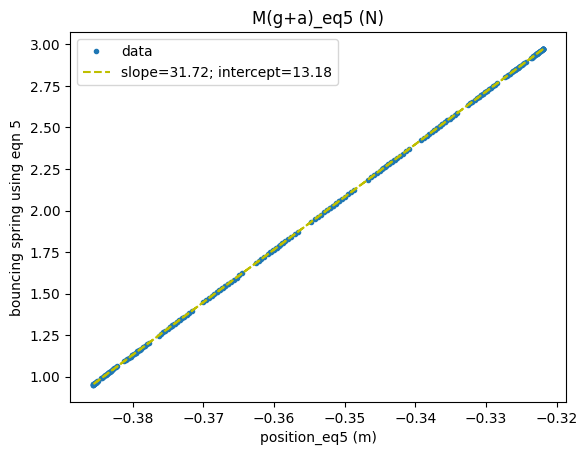

In [ ]:
#7.2.6
#go find k_eq5

Xvalues=-fit_parameters["fitfunc"](tt)   #something needs to be added here for this block to work.
Yvalues=bouncing_mass*(a_eq5+9.81)  #something needs to be added here for this block to work.
def model_Linear(x,m,b):  #We are using y=m x+b as our model
  return m*(x)+b

[m_opt, b_opt], pcov = curve_fit(model_Linear, Xvalues, Yvalues)
y_model = model_Linear(Xvalues, m_opt, b_opt)  #this uses the optimum slope and intercept that were just calculated to calculate y_model values our Linear Model

plt.plot(Xvalues,Yvalues, '.',   label="data")
plt.plot(Xvalues,y_model, '--y', label='slope='+str(m_opt)[0:5]+'; intercept='+str(b_opt)[0:5])
plt.title("M(g+a)_eq5 (N)")
plt.xlabel("position_eq5 (m)")
plt.ylabel("bouncing spring using eqn 5")

plt.legend()
plt.show()

k_eq5=m_opt


In [ ]:
#7.2.7
print("k_CBR = ", k_CBR)
print("k_eq2 = ", k_eq2)
print("k_eq5 = ", k_eq5)
#Are these values still reasonably close?

k_CBR =  29.60983697740028
k_eq2 =  30.540277423367453
k_eq5 =  31.720868306448082


Part 3

In [ ]:
#7.3.1
#Use the tools we have built above to determine which method produces the best value for k.  Take lots of data.
#You might want to delete some of blocks of code above that just print debugging statments so your code runs faster.

#control section
k_CBR_control=np.array([30.703,30.703,28.797,29.443,30.328,30.501])  #these arrays need to be filled in with real data
k_eq2_control=np.array([40.869,40.869,39.225,39.384,40.057,39.994])
k_eq5_control=np.array([47.313,47.313,45.706,45.475,46.589,46.641])

#please generate the graph(s) needed to visualize this data.

In [ ]:
#7.3.2
#changing sampling rate section
sample_rate=np.array([10,20,30,40,50]) #these arrays also need to be filled in with real data
K_CBR=np.array([6.011,20.634,24.462,27.693,29.609])
K_eq2=np.array([16.749,16.749,27.338,29.296,30.54])
K_eq5=np.array([30.06,30.06,29.289,30.831,31.721])

In [ ]:
#7.3.3
#space for final plots and analysis


